In [26]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt

# Define your data generation function
def generate_data(seed=0):
    np.random.seed(seed)
    b, m1, m2, m3 = 4, -3, -2, 3
    sigma = 0.1
    
    x_train = np.random.uniform(-1, 1, 10000)
    x_valid = np.random.uniform(-1, 1, 2000)
    x_valid.sort()

    y_train = np.random.normal(b + m1 * x_train + m2 * (x_train)**2 + m3 * (x_train)**3, sigma)
    y_valid = np.random.normal(b + m1 * x_valid + m2 * (x_valid)**2 + m3 * (x_valid)**3, sigma)

    # Reshape inputs to (N, 1) for Keras
    return x_train.reshape(-1, 1), y_train, x_valid.reshape(-1, 1), y_valid

# Define a model builder function
def build_model():
    model = Sequential([
        Dense(32, activation='relu', input_shape=(1,)),
        Dense(16, activation='relu'),
        Dense(1)
    ])
    return model

# Train and evaluate model with specified optimizer
def train_and_evaluate(optimizer, x_train, y_train, x_valid, y_valid, epochs=50, batch_size=32):
    model = build_model()
    model.compile(loss='mean_squared_error', optimizer=optimizer)
    history = model.fit(
        x_train, y_train,
        validation_data=(x_valid, y_valid),
        epochs=epochs,
        batch_size=batch_size,
        verbose=0,
        shuffle=True
    )
    return history

In [28]:
x_train, y_train, x_valid, y_valid = generate_data()

# Define optimizers to compare
optimizers = {
    'SGD': tf.keras.optimizers.SGD(learning_rate=0.01),
    'Adagrad': tf.keras.optimizers.Adagrad(learning_rate=0.01),
    'Adam': tf.keras.optimizers.Adam(learning_rate=0.01),
    'Adadelta': tf.keras.optimizers.Adadelta(learning_rate=1.0) 
}

# Train models and store histories
histories = {}
for name, opt in optimizers.items():
    print(f"Training with optimizer: {name}")
    histories[name] = train_and_evaluate(opt, x_train, y_train, x_valid, y_valid)

Training with optimizer: SGD


2025-06-01 14:21:57.561475: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] PluggableGraphOptimizer failed: INVALID_ARGUMENT: Failed to deserialize the `graph_buf`.


Training with optimizer: Adagrad


2025-06-01 14:23:03.753848: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] PluggableGraphOptimizer failed: INVALID_ARGUMENT: Failed to deserialize the `graph_buf`.


Training with optimizer: Adam


2025-06-01 14:24:28.045190: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] PluggableGraphOptimizer failed: INVALID_ARGUMENT: Failed to deserialize the `graph_buf`.


Training with optimizer: Adadelta


2025-06-01 14:26:47.200459: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] PluggableGraphOptimizer failed: INVALID_ARGUMENT: Failed to deserialize the `graph_buf`.


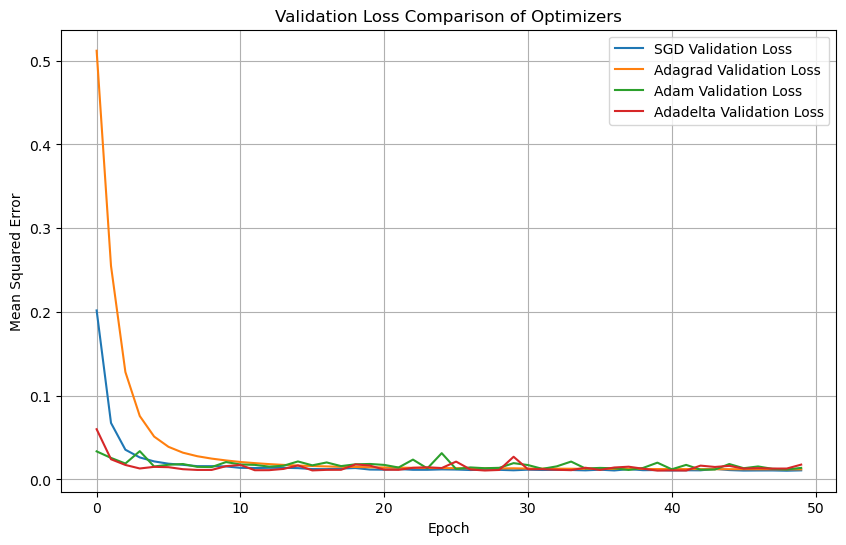

In [32]:
plt.figure(figsize=(10, 6))
for name, history in histories.items():
    plt.plot(history.history['val_loss'], label=f'{name} Validation Loss')
    #plt.plot(history.history['loss'], label=f'{name} Train Loss')
plt.xlabel('Epoch')
plt.ylabel('Mean Squared Error')
plt.title('Validation Loss Comparison of Optimizers')
plt.legend()
plt.grid(True)
plt.show()